packages to install

In [43]:
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import numpy as np
import pandas as pd  # csv file I/O
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
iris = pd.read_csv("D:\computer\AI-TASK\C3-Task\MEDIUM\IRIS.csv")  # ** loaded the input dataset from my local system.

In [46]:
iris.head(2)  # ** to see the first two rows of the iris model input dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [47]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 now let us plot a graph to see the relationship between sepal_length and width.
 sepal_length --> x-axis and sepal_width --> y-axis.

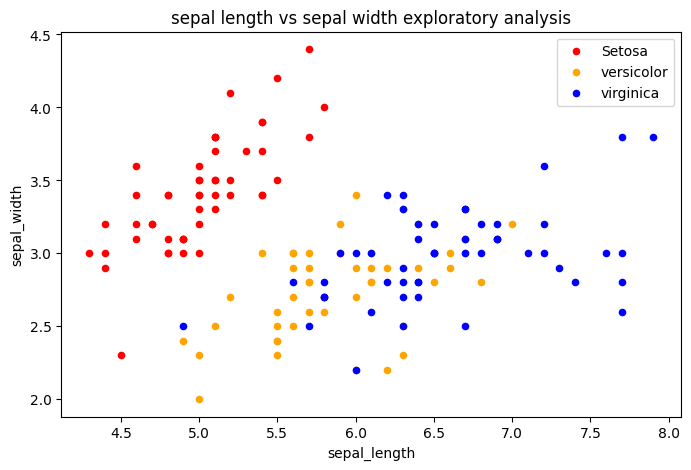

In [48]:
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='red',label='Setosa')
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange',label='versicolor',ax=fig) # ** ax = fig means that the graph of 
# ** this will be plotted in the same axes as was done for the previous one.
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue',label='virginica',ax=fig)
fig.set_xlabel=("sepal_length")
fig.set_ylabel=("sepal_width")
fig.set_title("sepal length vs sepal width exploratory analysis")
fig=plt.gcf()  # ** gcf() is inside matplotlib --> get current function.
fig.set_size_inches(8,5)
plt.show()

Relationship between petal length and petal width

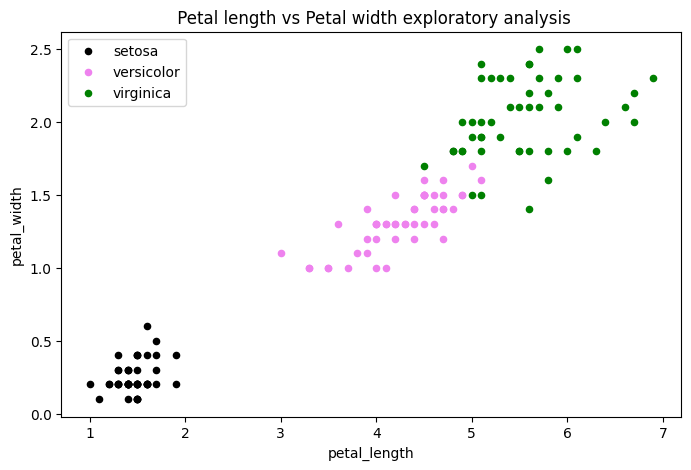

In [49]:
fig = iris[iris.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='black', label='setosa')

iris[iris.species=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='violet', label='versicolor',ax=fig)

iris[iris.species=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)

fig.set_xlabel("petal_length")
fig.set_ylabel("petal_width")
fig.set_title(" Petal length vs Petal width exploratory analysis")

fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

now let us plot a graph using matplotlib to figure out how the length and width are distributed

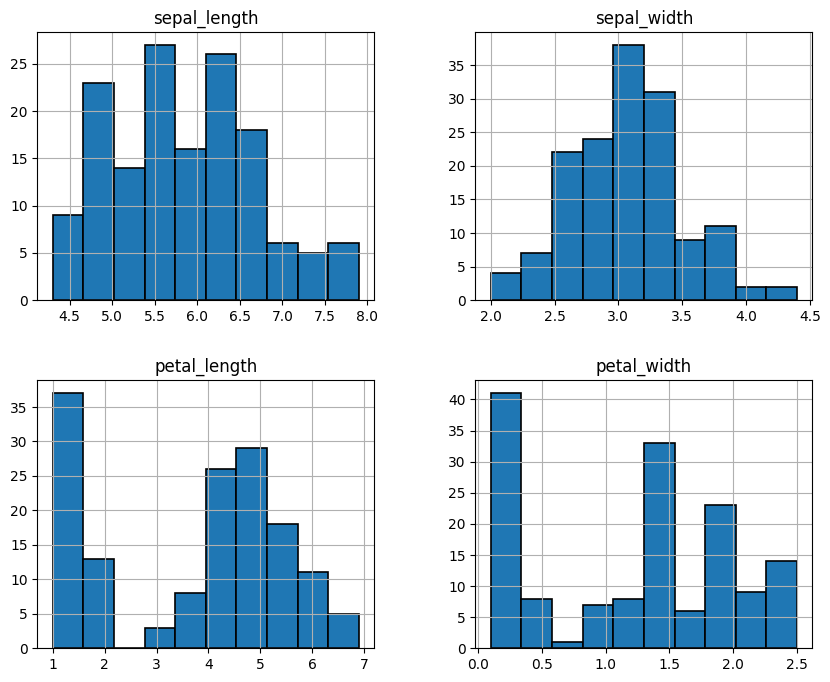

In [50]:
iris.hist(edgecolor='black',linewidth=1.2)  # ** I think the y axis is telling the numbers and x-axis the sepal_length/sepal_width
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

now I will import all the necessary packages

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # ** cross_validation has been depriciated.
from sklearn import svm
from sklearn import metrics

In [52]:
iris.shape

(150, 5)

Now one important thing is that if we take all the features then the accuracy of the model will decrease which we don't want

That's why we can do feature selection

I am trying to find the feature selection but its giving me error. I tried to covert the data to numeric but still facing issue there as well. I have to work on this part.

Now I will split the data into training and testing data.

In [53]:
train, test = train_test_split(iris, test_size=0.3)   # ** the last 30% of the input data will go to the test data and rest 70% data to train data
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Also while feature selection my last column which is the label columns was removed so i can't use that feature selection for now I have to think of a way.

In [54]:
train_x = train[['sepal_length','sepal_width','petal_length','petal_width']] # ** this is the input data for training set
train_y = train.species  # ** this is the label for the data of training set

test_x = test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y = test.species


Now let's check the train and the test dataset

In [55]:
train_x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
86,6.7,3.1,4.7,1.5


In [56]:
test_x.head(2)

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
139,6.9,3.1,5.4,2.1


In [57]:
train_y.head()  # ** output of the training data

89     Iris-versicolor
86     Iris-versicolor
67     Iris-versicolor
117     Iris-virginica
70     Iris-versicolor
Name: species, dtype: object

Now we will apply svm/svr. What I have understood from this is that you seperate the different classes using a hyperplane and there are also decision boudaries.
Depending on this there are positive classes and negative classes. we can use this support vector regression to predict the model very quickly.
mathematical equation for hyperplane ==> y = wx + b
now so we can infer from this is like:
-a < y-(wx+b) < +a

In [58]:
model = svm.SVC()  # SVC --> support vector classifier; to fit to the data and give the hyperplane
# ** now we will pass the training data to the svr and get the prediction on test data
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print("the prediction of the support vector regression is: ")
print(metrics.accuracy_score(prediction,test_y))

the prediction of the support vector regression is: 
0.9777777777777777


Logistic Regression

In this we get the prediction between 0 and 1. f(x) = (1/1+e^-z) where z = y = b1.x1 + b2.x2 + b3.x3 + .... + bk.xk + a. The y is the equation for linear regression.

In [59]:
model = LogisticRegression()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print("the accuracy for the logistic regression for the training data: ")
print(metrics.accuracy_score(prediction,test_y))

the accuracy for the logistic regression for the training data: 
0.9777777777777777


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


now we will use the petals and sepals seperately to find the prediction using logistic regression.

In [60]:
petal = iris[['petal_length','petal_width','species']]
sepal = iris[['sepal_length','sepal_width','species']]


In [70]:
train_p,test_p = train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['petal_length','petal_width']]
train_y_p=train_p.species
test_x_p=test_p[['petal_length','petal_width']]
test_y_p=test_p.species

train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['sepal_length','sepal_width']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_length','sepal_width']]
test_y_s=test_s.species

Logistic Regression

In [71]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("the accuracy of the petals using lr: ")
print(metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("the accuracy of the sepals using lr: ")
print(metrics.accuracy_score(prediction,test_y_s))

the accuracy of the petals using lr: 
0.9777777777777777
the accuracy of the sepals using lr: 
0.8222222222222222
